### this code snippet is taken from www.kaggle.com please use this website in learning process
# **BASIC IDEA**


## **What is Linear Regression?**
#### This code snippet are taken from KAGGLE and manipulated by your lecturer for the lesson
Before coming onto the technical definition of Linear Regression lets first understand meaning of terms "Linear" & "Regression".

> **Linear** -> A linear equation, or Linearity, describes a situation in which one thing changes at the same rate as other, so that the relationship between them does not change.

> **Regression** -> Regression analysis is a statistical method that helps us to analyze and understand the relationship between two or more variables of interest.

Hence, we can now say that Linear Regression is a technique to find the realtionship between multiple variables and establish a Linear Pattern among variables so that we can make future predictions following that pattern.

For example, if we take age and height as two variables (arrays/lists) both having, lets say 1000 values each respectively, so can't we easily make prediction by taking a random input as age and predict possible height?

Or, if we take another example as,

>  Let's say we have a variable x = [1, 2, 3, 4, 5, 6, 7]

>  And another variable y = [5, 10, 15, 20, 25, 30, 35]

>  Now if we pay attention then, according to above definitions, each value of y in linearly in relation with each respective value of x, lets see by graph

In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Setting up variables
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([15, 20, 25, 30, 35, 40, 45])

#Plotting Graph
graph1 = plt.plot(x, y)
plt.xlabel('X')
plt.ylabel("y")
plt.title("Graph 1")
plt.show()

## **Conclusion**


As now we can see here, variable **y** is linearly in relation with variable **x** as **y** changes itself with same ratio as **x** does.

Now since this graph is a straight line, lets find out intercept and slope of the line to draw equation of this line.

In [ ]:
m = (y[1]-y[2])/(x[1]-x[2]) #Formula to calculate slope
c = y[0] - m*x[0] #Formula for intercept

print(f'Slope: {m}\nIntercept: {c}\nEquation Of Line: y = {m}x + {c}')

So, now on behalf of this relation we have built an equation of line which now will act as function to predict the **y** value for any random input **x** value

In [ ]:
#Building function
Y = lambda x: m*x + c
print(f"Y = {Y(8)}")

# **MACHINE LEARNING APPROACH**
Above we saw a very simple and rough idea behind working of Linear Regression where we first had list of inputs **(x)** and list of outputs **(y)**. Later we found out the relation between both lists' data items and then at last drew a function out from them through which we can now predict **y** value for any input we want.

Since in above example we use mathematical approach, let's now try Machine Learning Approach.Above we saw a very simple and rough idea behind working of Linear Regression where we first had list of inputs **(x)** and list of outputs **(y)**. Later we found out the relation between both lists' data items and then at last drew a function out from them through which we can now predict **y** value for any input we want.

Since in above example we use mathematical approach, let's now try Machine Learning Approach.

In [ ]:
#Importing required libraries
from sklearn.linear_model import LinearRegression #Importing Linear Regression module. To be discussd in details later
regressor = LinearRegression() #Building Linear Regression object as "regressor"
regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1)) #Reshape(-1, 1) is coverting the array into a single column

#Plotting Graph1
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel("y")
plt.title("Graph 2")
plt.show()

In [ ]:
#Making predictions for random input values for x
print("y = ", regressor.predict([[8]]))

In [ ]:
#Verifying Equation Of Line
m_lr = regressor.coef_ #Slope derived from Machine Learning model
c_lr = regressor.intercept_ #Intercept derived from Machine Learning model
print(f'Slope: {m}\nIntercept: {c}\nEquation Of Line: y = {m_lr}x + {c_lr}')

As we can see, we have came to same conclusion through Linear Regression also. And in Machine Learning approach we were not required to calculate slope, intercept or Equation of Line prior, model does it automatically.

This example was very Naive and thats why we were able to calculate Equation Of Line so easily manualy too, but when taking real data in consideration it becomes very complex and time consuming to make predictions without using Machine Learning. Therefore, Linear Regression is used to make predictions on real world data.

Since we have covererd this basic Analogy to Linear Regression, now lets dive into the real and technical picture of Linear Regression Algorithm.

# **LINEAR REGRESSION INTUITION**
**Linear Regression** is the simplest **Regression Model** in **Supervised Learning** in Machine Learning. It is a linear approach for modelling the relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variables). The case of one independent variable is called **Simple Linear Regression** and for more than one, the process is called **Multiple Linear Regression**.
* **Simple Linear Regression** uses a single feature (independent variable) to predict a target (dependent variable).

 * *y = (m)x + (c)*, or
 
 * *y = (Z0) + (Z1)x*
 
* **Multiple Linear Regression** uses more than one feature to predict a target variable by fitting linear relationship.

 * *y = (m1)x1 + (m2)x2 + .... + (mn)xn + c*, or
 
 * *y = (Z0) + (Z1)x1 + (Z2)x2 + .... + (Zn)xn*

# **SIMPLE LINEAR REGRESSION**

## **Let's understand by help of the Use Case - Salary vs Experience**

In this dataset we are provided two features (columns), first one being **Experience in years** (independent feature/variable) and second being **Salary** (dependent feature/variable).

Let's take a view on our dataset.

In [ ]:
import pandas as pd #Importing Pandas library for data manipulation work
dataset = pd.read_csv("../input/salary-data-simple-linear-regression/Salary_Data.csv") #Creating a dataframe of required data
dataset.head(10) #Display first 10 rows of dataset


Let's plot this dataset on graph,

In [ ]:
X = dataset["YearsExperience"].values.reshape(-1,1)
y = dataset["Salary"].values.reshape(-1,1)

figure(figsize=(12, 9), dpi=80)
plt.scatter(X, y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Graph2")
plt.show()

We can see that in this dataset **Salary** and **YearsExperience** are not having a perfect linear relationship, i.e. values of both features are not changing in same ratio oterwise all the points must have been plotted in a single straight line. And this is the scenario of the real data that we will never get a perfect linear relationship, and therfore, Linear Regression is used to find that equation of line, from infinite equations of line, which will be closest to all data points.

Now questions arises,
1. How to calculate that how close is a Regression Line with all data points?
2. How to find that closest Regression Line? 

### **1. How to calculate that how close is a Regression Line with all data points?**

> This can be calculated by first calculating distance of each point from that line of regression.
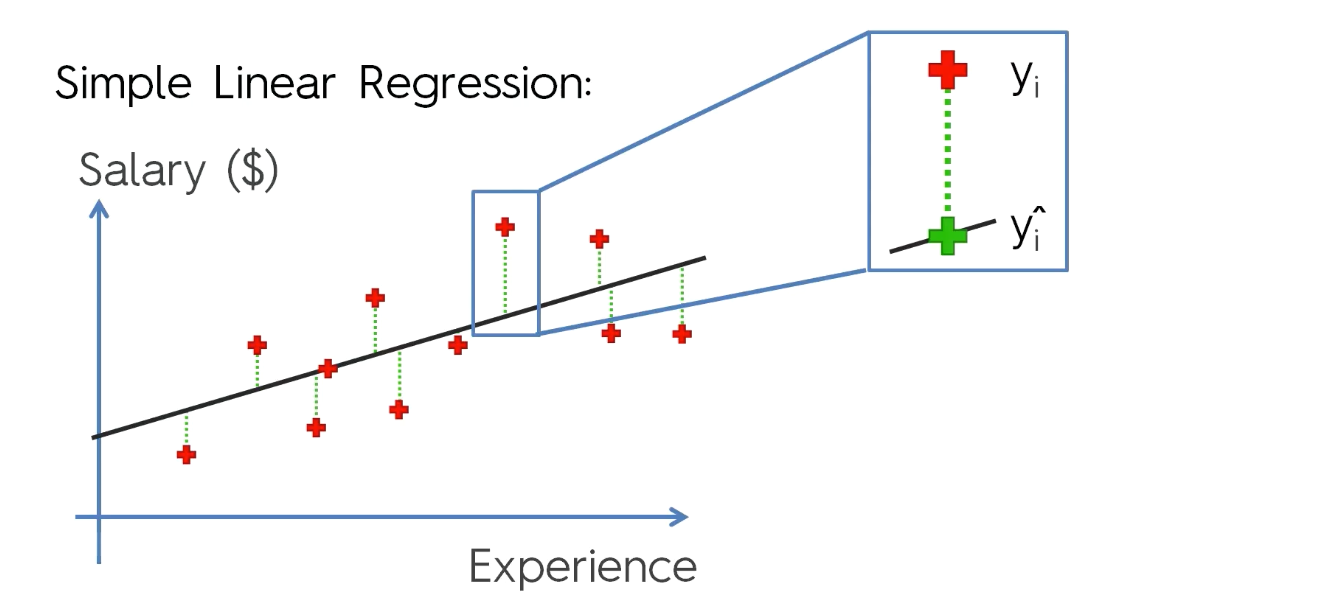

> Now square this distance for each point and then calculate sum of squarred distances of all the points. { SUM[ (yi - yi*)^2 ] for i from 0 to n }
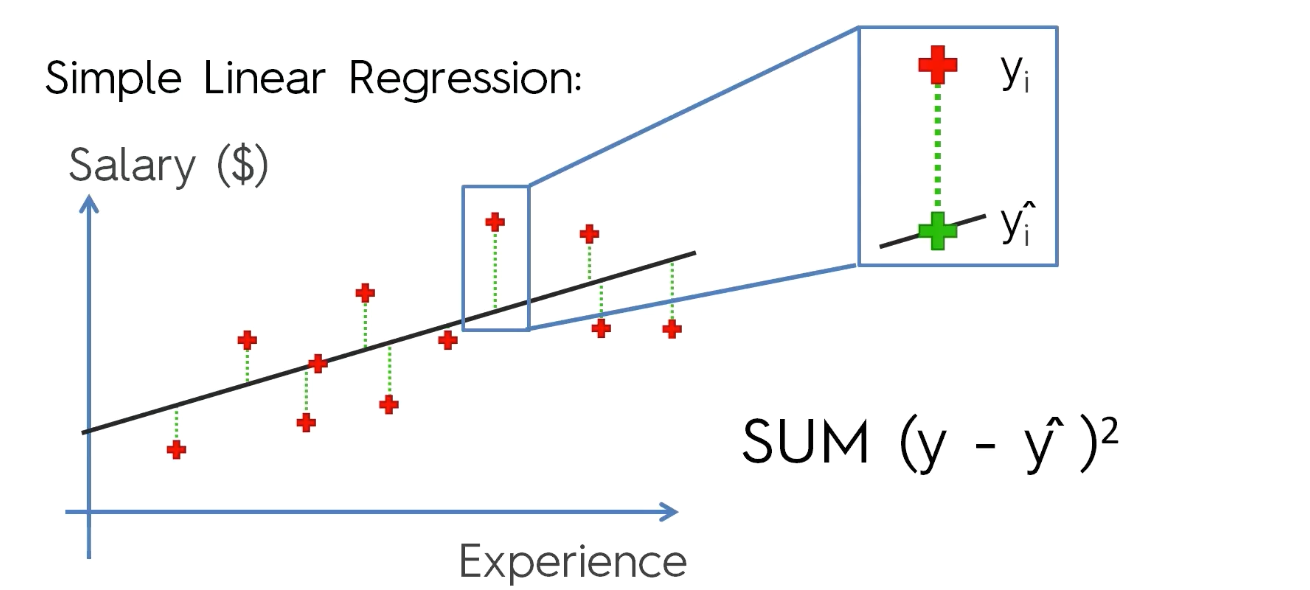

### **2. How to find that closest Regression Line?**

> Since we know how to calculate **Sum of Sqaurred Errors** of any regression line, we have to now keep changing the values of **slope/coefficient (m/Z1)** and **intercept/bias (c/Z0)**, as each set of both represents one unique regression line, and calculate **Sum of Sqaurred Errors** for each line and the line having least **Sum of Sqaurred Errors** will be our final regression line.

> In short, we have to minimise **Sum of Sqaurred Errors** over the set of all possible regression lines.
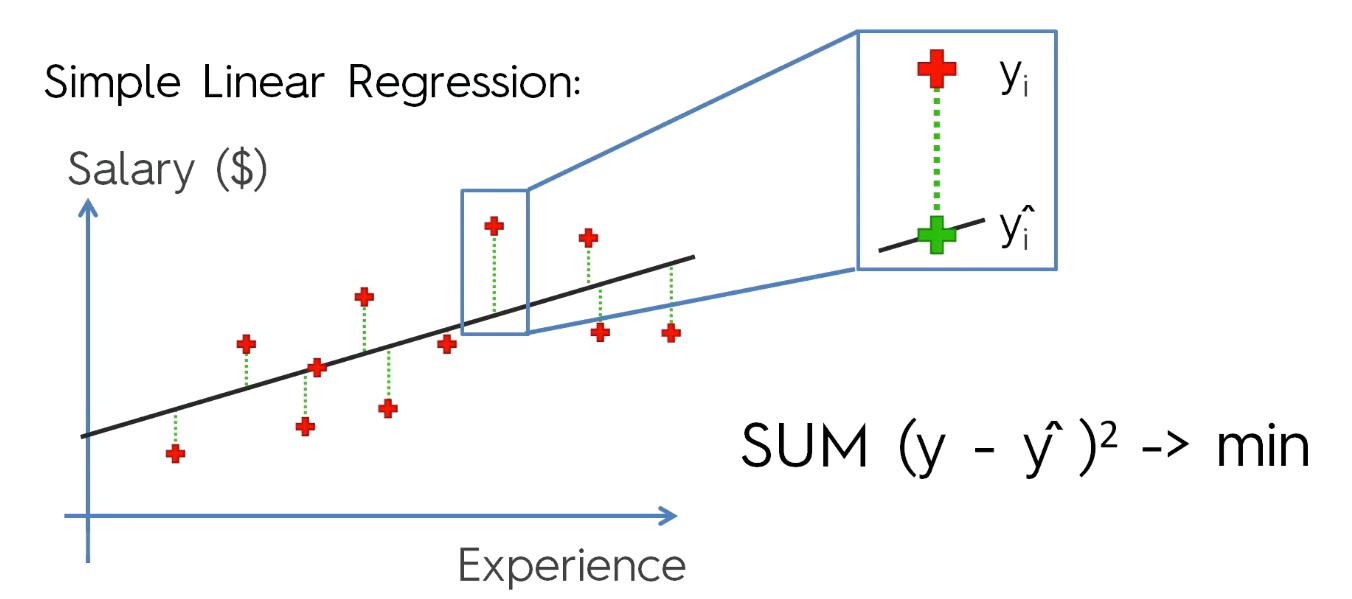

let's understand this through following graph,

In [ ]:
#Lets take some sets of slopes and intercepts and calculate sum of squarred errors
slopes = [i for i in range(5000, 16000, 1000)] #11 slopes
intercepts = [i for i in range(21000, 32000, 1000)] #11 intercepts
reg_lines = {}

for i,j in zip(slopes, intercepts): #Creating 11 different key-value pairs of slopes:intercepts 
    reg_lines[i] = j 
print(reg_lines)

In [ ]:
#Plotting all Regression Lines from reg_lines
figure(figsize=(12, 9), dpi=80) 
plt.scatter(X, y)

for m, c in reg_lines.items():
    y_new = m*X + c
    plt.plot(X, y_new)

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Graph2")
plt.show()

So now we have plotted all the possible 11 regression lines from reg_lines and now we will calculate **Sum of Squarred Errors** for each line and store sums in a list called **Sums**.

In [ ]:
Sums= []

for m, c in reg_lines.items():
    sum_of_squares = 0
    y_new = lambda x: m*x + c
    
    for i,j in zip(X, y):
        sum_of_squares += (j - y_new(i))**2
        
    Sums.append(list(sum_of_squares))

Sums

Now we have list of **Sums of Squarred Errors** for each regression line and now our final task is to select the line with min sum, i.e. select that particular key:value pair of slop:intercept which resulted in least **Sums of Squarred Errors**.

In [ ]:
min_sum = min(Sums) #Calculating minimum sum from list of sums.
index = Sums.index(min_sum) #Finding index of minimum sum in list of sums

reg_lines_list = list(reg_lines.items()) #Converting reg_lines dictionary to reg_lines_list list to fetch required slope:intercept from index

m = reg_lines_list[index][0]
c = reg_lines_list[index][1]

y_new = m*X + c #Required Regression Line

print(f"Slope: {m}\nIntercept: {c}\nRegression Line: y_new = {m}x + {c}")

In [ ]:
figure(figsize=(12, 9), dpi=80) 
plt.scatter(X, y)

plt.plot(X, y_new, c='red')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Graph2")
plt.show()

Hence, our required Regression Line.

### **Let's summarise what we have done here;**
1. We loaded our dataset which had two columns, **YearsExperience** (independent) & **Salary** (dependent).

2. We then assigned independent variable to **x** and dependent to **y**.

3. We plotted graph for **(x, y)** to check whether they are perfectly linear or not.

4. We observed that, like most of the cases, dataset was not perfectly linear as data points were not falling in single straight line.

5. We then learnt that we can draw multiple regression lines randomly and then see which regression line will have **Least Cost Function (Sum of Squarred Errors)** with actual data points.

6. We then created a dictionary having slope:intercept as key:value pair and thus each key:value pair was representing one unique regression line.

7. We then plotted all regression lines from that dictionary.

8. Then we calculated **Cost Function** for each regression line and stored in one single list, Sums.

9. We then picked minimum value from list **Sums** along with its index and then we fetched slope:intercept pair of that particular index from dictionary as those slope:intercept pair resulted this minimum **Cost Function**.

10. We than plotted our final graph with our required Regression Line.

Now, in above steps, step 6 is most problamatic as it requires us to manually type all of the possibe values for slope and intercept, which is infinite. And if we dont give all possible values, then it will reduce accuracy drastically.

So, to solve this problem, we will now understand what **Gradient Descent** is.

## **GRADIENT DESCENT**

Gradient descent is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning and deep learning to minimise a cost/loss function.

**Working:**
* First we have to understand that we can write our equation, **y = mx +c** in form of **y = (Z0) + (Z1)x**. { Z0 = c, Z1 = m }

* Which means our **Cost Function** will become from **F(y_new) = sum[(y - y_new)^2]** to **F(Z0, Z1) = sum[(y - (Z0 + (Z1)x)^2]**

* This means, we can represent our **Cost Function** as **F(Z0, Z1)**.

* Now, Gradient Descent will act on this function, **F(Z0, Z1)** and will give set of **Z0** & **Z1** as an output which will generate our required regression line with least value of **Cost Function**. 

**Concept:**
> In background, it iteratively updates the values **Z0** & **Z1** as 

*  **Z1 := Z1 - α(differential_of_F(Z0, Z1) with respect to Z1)**
*  **Z0 := Z0 - α(differential_of_F(Z0, Z1) with respect to Z0)**
* **"α"** (alpha), here is the learning rate, i.e. by how much value do we want to keep changing the values of **Z0** & **Z1**.

* Initially, values of **Z0** & **Z1** are kept 0 and then they are changed slowly.

* Both **Z0** & **Z1** are changed simulatanrously but to make it simple we will change **Z0** only now.

* This graphs depicts the curve drawn as **F(Z0, Z1)** on y-axis & **Z0** on x-axis.
* 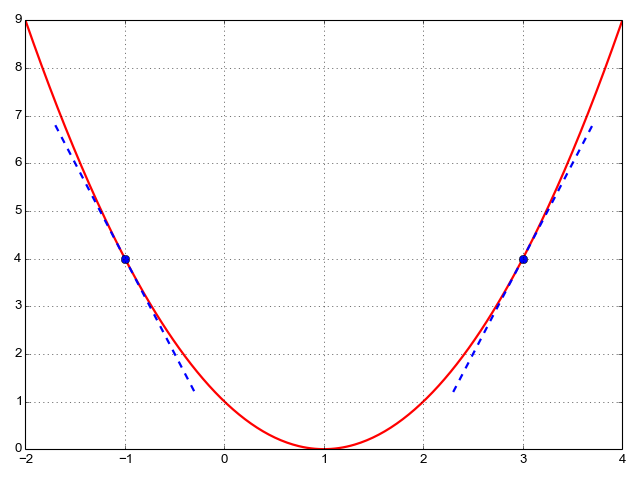

* Optimum value of **Z0** is that value which will result minum **F(Z0,Z1)**. 

* As you can see, when **Z0** will be lower than **optimum Z0** then **differential_of_F(Z0, Z1) with respect to Z0** will be -ve {-ve slope}, thus value of **Z0** will increase.
 > **Z0 := Z0 + α(differential_of_F(Z0, Z1) with respect to Z0)** { -α * (-ve slope) }

* Similiarly, when **Z0** will be greater than **optimum Z0** then **differential_of_F(Z0, Z1) with respect to Z0** will be +ve {+ve slope}, thus value of **Z0** will decrease.
 > **Z0 := Z0 - α(differential_of_F(Z0, Z1) with respect to Z0)** { -α * (+ve slope) }

* And this cycle will keep going unitil **optimum Z0** value is reached

* As lower the learning rate would be, more accurate but slow Gradient Descent will be.
* 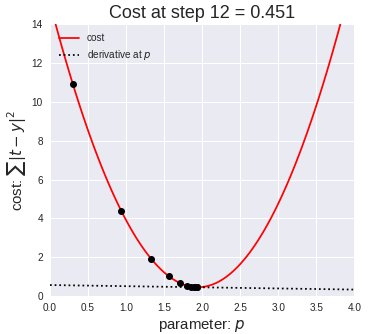

### **So now our steps are reduced to :**

1. Load our dataset which had two columns, **YearsExperience** (independent) & **Salary** (dependent).

2. Assigned independent variable to **x** and dependent to **y**.

3. Plot graph for **(x, y)** to check whether they are perfectly linear or not.

4. Prepare Cost Function.

5. Minimise Cost Function using Gradient Descent.

6. Obtain value of Z0 and Z1 after performing Gradient Descent.

7. Plot the required regression line with help of new equation of line formed using Optimum Z0 and Z1 values.

### **But how to perform Gradient Descent in python?**

Well need not to worry about that because now we will see most simplest solution to all Linear Regression problems.

Now we will scikit-learn library and used already build Linear Regression Model in it. Only what we need to do is to train this model by providing it data, rest it will do itself.

In [ ]:
from sklearn.linear_model import LinearRegression #Importing again just for teaching purpose
regressor = LinearRegression()

regressor.fit(X, y)

y_pred = regressor.predict(X)

figure(figsize=(12, 9), dpi=80) 
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), c='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Graph2")
plt.show()

And that's our Regression Line.

In [ ]:
m = regressor.coef_
c = regressor.intercept_
print(f"Slope: {m[0][0]}\nIntercept: {c}\nRegression Line: y_new = {m[0][0]}x + {c[0]}")

Therefore, instead of **y_new = 9000x + 25000** the best regression line is **y_new = 9449.962321455076x + 25792.200198668696**

## **Now lets work on some larger datasets**
# **RANDOM LINEAR REGRESSION :**

In [ ]:
train_dataset2 = pd.read_csv("../input/random-linear-regression/train.csv") #Importing training dataset
train_dataset2.head(10) #Printing first 10 rows

In [ ]:
train_dataset2.info() #Analysizing info of dataset

In [ ]:
train_dataset2.dropna(inplace = True) #Removing Null Values

In [ ]:
train_dataset2.info()

In [ ]:
test_dataset2 = pd.read_csv("../input/random-linear-regression/test.csv") #Importing Test Dataset
test_dataset2.head(10) #Showing first 10 rows

In [ ]:
test_dataset2.info() #Analalyzing dataset

In [ ]:
#Creating traing and testing dependent & independent variables
X_train = train_dataset2["x"].values.reshape(-1, 1)
y_train = train_dataset2["y"].values.reshape(-1, 1)

X_test= train_dataset2["x"].values.reshape(-1, 1)
y_test= train_dataset2["y"].values.reshape(-1, 1)

In [ ]:
regressor2 = LinearRegression() #Building Simple Linear Regression Model
regressor2.fit(X_train, y_train) #Training Simple Linear Regression Model

In [ ]:
y_pred = regressor2.predict(X_test) #Making Predictions

In [ ]:
#Plotting Graph over Test Data
figure(figsize=(12, 9), dpi=100) 
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

In [ ]:
#Finding Accuracy of Model
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

For getting more knowledge regarding finding Accuracies of regression models, refer :-
[http://ml-concepts.com/2022/01/19/r-squared-r%c2%b2-measure-for-model-selection/](http://ml-concepts.com/2022/01/19/r-squared-r%c2%b2-measure-for-model-selection/)

In [ ]:
m = regressor2.coef_
c = regressor2.intercept_
print(f"Slope: {m[0][0]}\nIntercept: {c}\nRegression Line: y_new = {m[0][0]}x + {c[0]}")

This was the example and working flow of **SIMPLE LINEAR REGRESSION**. 

# **MULTIPLE LINEAR REGRESSION**

In [ ]:
dataset3 = pd.read_csv("../input/startup-logistic-regression/50_Startups.csv") #Importing Dataset
dataset3.head(10) #Printing first 10 rows

In [ ]:
dataset3.info() #Analyzing dataset

In [ ]:
X3 = dataset3.iloc[:, 0:3] #Taking first 3 columns as independent variables
y3 = dataset3.iloc[:, -1] #Taking last column as dependent variable

In [ ]:
#As training and testing data was not given before so we split availabe dataset as Training data (X_train & y_train) = 80% and Testing Data (X_test & y_test) = 20%
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state = 42)

This method is known as **Cross Validation** and is used to overcome **Overfitting**.
> Refer here for more info regarding Cross Validation: [https://ml-concepts.com/2022/01/13/4-cross-validation-to-reduce-overfitting/](https://ml-concepts.com/2022/01/13/4-cross-validation-to-reduce-overfitting/)

> Refer here for more info regarding Overfitting: [https://ml-concepts.com/2022/01/10/using-bias-and-variance-for-model-selection/](https://ml-concepts.com/2022/01/10/using-bias-and-variance-for-model-selection/)

In [ ]:
regressor3 = LinearRegression() #Bulding Multiple Linear Regression Model
regressor3.fit(X_train3, y_train3) #Training Multiple Linear Regression Modelplacement_exam_marks

In [ ]:
y_pred3 = regressor3.predict(X_test3) #Making Predictions

In [ ]:
#Finding Accuracy of Model
accuracy3 = r2_score(y_test3, y_pred3)
print("Accuracy:", accuracy3*100,"%")

In [ ]:
m = regressor3.coef_
c = regressor3.intercept_
print(f"Coefficients: {m}\nIntercept: {c}\nRegression Line: y_new = {m[0]}x1 + {m[1]}x2 + {m[2]}x3 + {c}")

This was the example and working flow for **MULTIPLE LINEAR REGRESSION**.

# **DON'T FORGET TO REFER THESE PAGES FOR MORE KNOWLEDGE:**

1. R2_Score for finding Accuracies :- [http://ml-concepts.com/2022/01/19/r-squared-r%c2%b2-measure-for-model-selection/](http://ml-concepts.com/2022/01/19/r-squared-r%c2%b2-measure-for-model-selection/)
2. Cross Validation :- [https://ml-concepts.com/2022/01/13/4-cross-validation-to-reduce-overfitting/](https://ml-concepts.com/2022/01/13/4-cross-validation-to-reduce-overfitting/)
3. Overfitting, Underfitting, Bias & Variance :- [https://ml-concepts.com/2022/01/10/using-bias-and-variance-for-model-selection/](https://ml-concepts.com/2022/01/10/using-bias-and-variance-for-model-selection/)